In [1]:
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [5]:
with open('../data/learning_curve.json') as json_file:
    data = json.load(json_file)

In [6]:
data

{'1': {'f1_overall': [0, 0.381294964028777, 0.2753503709810387],
  'f1_negative': [0.6988847583643123, 0.693950177935943, 0.705724807499163],
  'f1_positive': [0, 0.381294964028777, 0.2753503709810387],
  'precision_overall': [0, 0.6339712918660287, 0.6929460580912863],
  'precision_positive': [0, 0.6339712918660287, 0.6929460580912863],
  'precision_negative': [0.5371428571428571,
   0.579667063020214,
   0.5669714900484131],
  'recall_overall': [0, 0.2726337448559671, 0.17181069958847736],
  'recall_positive': [0, 0.2726337448559671, 0.17181069958847736],
  'recall_negative': [1, 0.8643617021276596, 0.9343971631205674],
  'confusion_matrix': {'1': {'fp': 0,
    'fn': 972,
    'tp': 0,
    'tn': 1128,
    'positives': 820,
    'negatives': 1070,
    'total': 1890},
   '2': {'fp': 153,
    'fn': 707,
    'tp': 265,
    'tn': 975,
    'positives': 849,
    'negatives': 1041,
    'total': 1890},
   '3': {'fp': 74,
    'fn': 805,
    'tp': 167,
    'tn': 1054,
    'positives': 842,
    'n

In [7]:
f1_overall = []
precision_overall = []
recall_overall = []
recall_positive = []
recall_negative = []
precision_positive = []
precision_negative = []
fn = []
fp = []
positives = []
negatives = []
total = []

for it, results in data.items():
    f1_overall.append(np.mean(results["f1_overall"]))
    precision_overall.append(np.mean(results["precision_overall"]))
    recall_overall.append(np.mean(results["recall_overall"]))
    
    recall_negative.append(np.mean(results["recall_negative"]))
    recall_positive.append(np.mean(results["recall_positive"]))
    
    precision_negative.append(np.mean(results["precision_negative"]))
    precision_positive.append(np.mean(results["precision_positive"]))

    total.append(results["confusion_matrix"]["1"]["total"])
    if int(it) < 10: 
        positives.append(np.mean([
            results["confusion_matrix"]["1"]["positives"],
            results["confusion_matrix"]["2"]["positives"],
            results["confusion_matrix"]["3"]["positives"]])
        )
        negatives.append(np.mean([
            results["confusion_matrix"]["1"]["negatives"],
            results["confusion_matrix"]["2"]["negatives"],
            results["confusion_matrix"]["3"]["negatives"]])
        )

        fn.append(np.mean([
            results["confusion_matrix"]["1"]["fn"],
            results["confusion_matrix"]["2"]["fn"],
            results["confusion_matrix"]["3"]["fn"]])
        )

        fp.append(np.mean([
            results["confusion_matrix"]["1"]["fp"],
            results["confusion_matrix"]["2"]["fp"],
            results["confusion_matrix"]["3"]["fp"]])
        )
    else:
        positives.append(results["confusion_matrix"]["1"]["positives"])
        negatives.append(results["confusion_matrix"]["1"]["negatives"])
        fn.append(results["confusion_matrix"]["1"]["fn"])
        fp.append(results["confusion_matrix"]["1"]["fp"])
        
f1_overall = np.array(f1_overall)
precision_overall = np.array(precision_overall)
recall_overall = np.array(recall_overall)
recall_positive = np.array(recall_positive)
recall_negative = np.array(recall_negative)
precision_positive = np.array(precision_positive)
precision_negative = np.array(precision_negative)
fn = np.array(fn)
fp = np.array(fp)
positives = np.array(positives)
negatives = np.array(negatives)
total = np.array(total)

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 25})

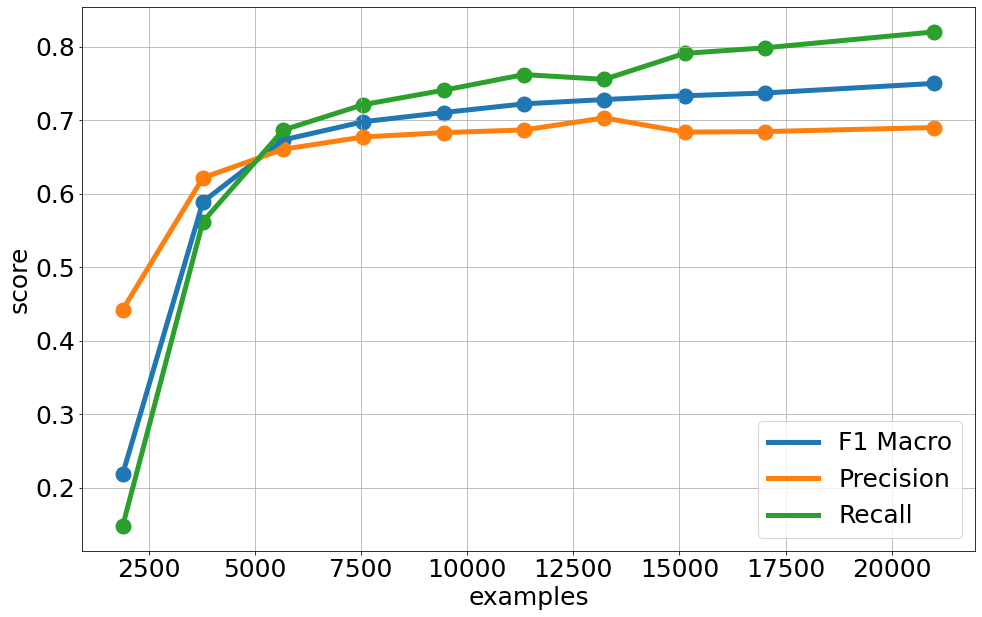

In [9]:
plt.figure(figsize=(16, 10))
plt.ylabel("score")
plt.xlabel("examples")
plt.grid(True)
plt.plot(total, f1_overall, label="F1 Macro", linewidth=5)
plt.scatter(total, f1_overall, linewidths=10)
plt.plot(total, precision_overall, label="Precision", linewidth=5)
plt.scatter(total, precision_overall, linewidths=10)
plt.plot(total, recall_overall, label="Recall", linewidth=5)
plt.scatter(total, recall_overall, linewidths=10)
plt.legend()
plt.savefig("f1-precision-recall.pdf")

In [25]:
[(2*p*r)/(p+r) for r, p in zip(precision_positive,recall_positive)]

[0.22195392128598476,
 0.590361815799664,
 0.6732576706895308,
 0.6985019234615263,
 0.7107420597080639,
 0.7224091579564937,
 0.728352226737955,
 0.7334192945059403,
 0.7370316549335341,
 0.7494039735099338]

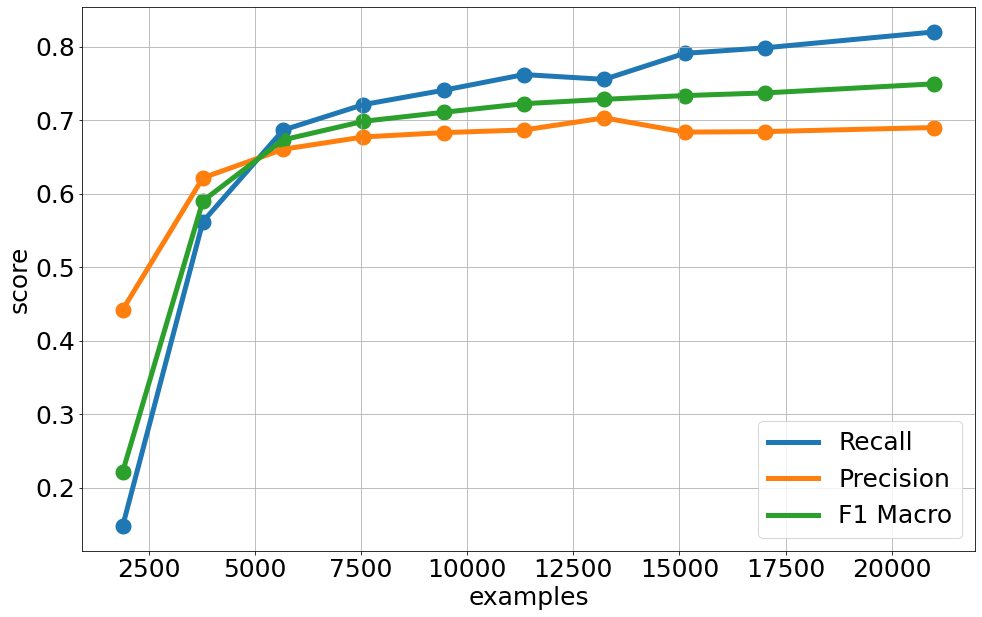

In [30]:
plt.figure(figsize=(16, 10))
plt.ylabel("score")
plt.xlabel("examples")
plt.grid(True)
plt.plot(total, recall_positive, label="Recall", linewidth=5)
plt.scatter(total, recall_positive, linewidths=10)
plt.plot(total, precision_positive, label="Precision", linewidth=5)
plt.scatter(total, precision_positive, linewidths=10)
f1_score = [(2*p*r)/(p+r) for r, p in zip(precision_positive,recall_positive)]
plt.plot(total, f1_score, label="F1 Macro", linewidth=5)
plt.scatter(total, f1_score, linewidths=10)
plt.legend()
plt.savefig("recall-precision-positiveclass.pdf")

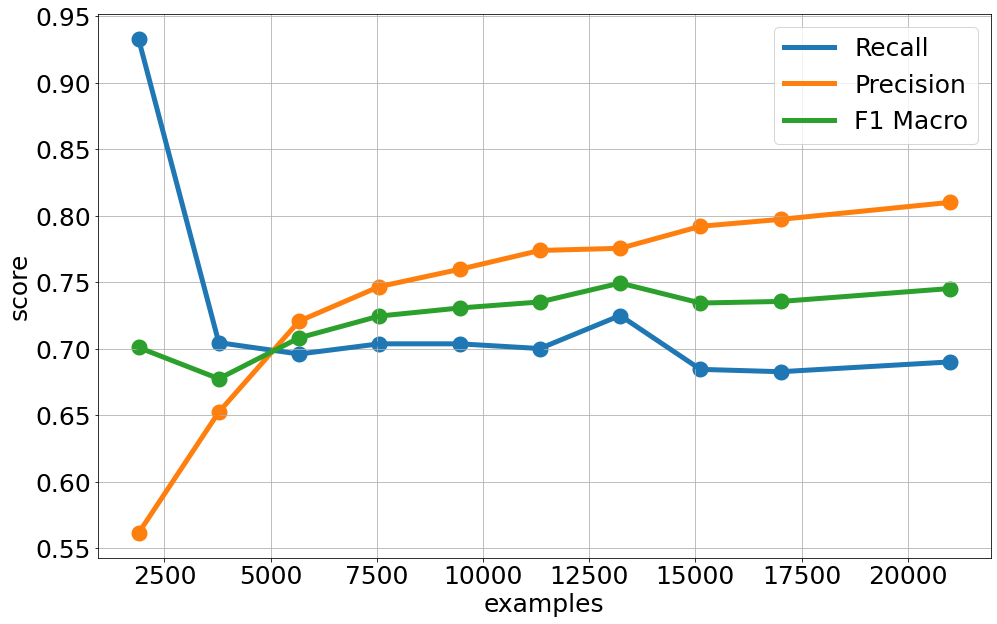

In [32]:
plt.figure(figsize=(16, 10))
plt.ylabel("score")
plt.xlabel("examples")
plt.grid(True)
plt.plot(total, recall_negative, label="Recall", linewidth=5)
plt.scatter(total, recall_negative, linewidths=10)
plt.plot(total, precision_negative, label="Precision", linewidth=5)
plt.scatter(total, precision_negative, linewidths=10)
f1_score = [(2*p*r)/(p+r) for r, p in zip(precision_negative,recall_negative)]
plt.plot(total, f1_score, label="F1 Macro", linewidth=5)
plt.scatter(total, f1_score, linewidths=10)
plt.legend()
plt.savefig("recall-precision-negativeclass.pdf")

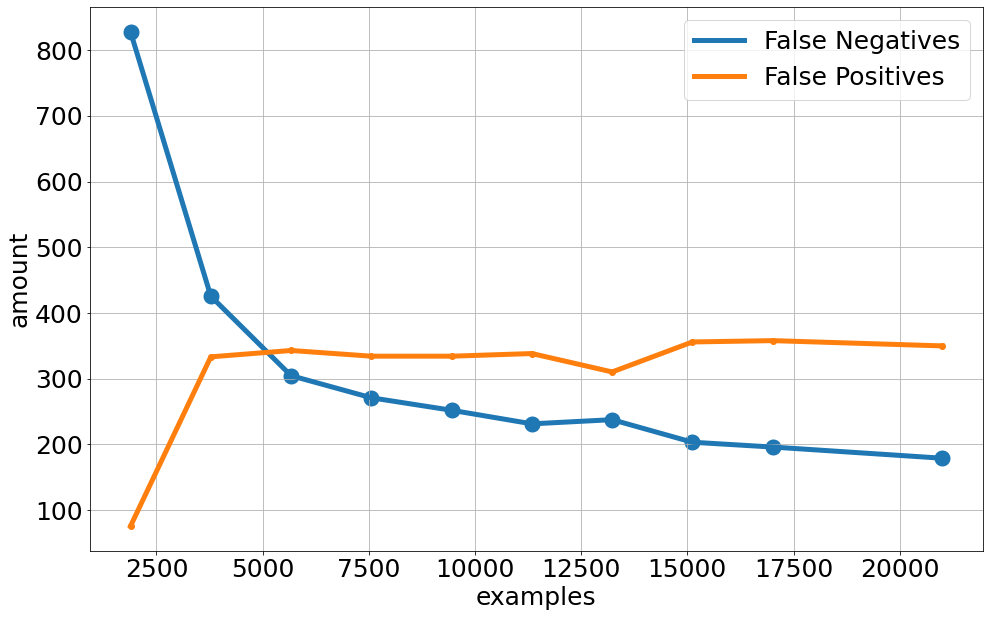

In [43]:
plt.figure(figsize=(16, 10))
plt.ylabel("amount")
plt.xlabel("examples")
plt.grid(True)
plt.plot(total, fn, label="False Negatives", linewidth=5)
plt.scatter(total, fn, linewidths=10)
plt.plot(total, fp, label="False Positives", linewidth=5)
plt.scatter(total, fp)
plt.legend()
plt.savefig("fn-fp.pdf")

In [ ]:
data["1"]["confusion_matrix"]